In [45]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%pylab inline
pylab.rcParams['figure.figsize'] = 12, 12
pylab.rcParams['figure.dpi'] = 100

Populating the interactive namespace from numpy and matplotlib


In [46]:
data = pd.read_csv('Motor_Vehicle_Collisions.csv', parse_dates=['CRASH DATE'])

In [47]:
data.sort_values(by='CRASH DATE').head(1)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1672140,2012-07-01,17:10,NaN,NaN,40.806346,-73.933172,POINT (-73.9331715 40.8063462),NaN,NaN,NaN,...,Unspecified,Unspecified,Unspecified,NaN,2864058,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN


In [48]:
data.sort_values(by='CRASH DATE').tail(1)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
61597,2020-04-11,1:20,NaN,NaN,40.82101,-73.93436,POINT (-73.93436 40.82101),HARLEM RIVER DRIVE,NaN,NaN,...,NaN,NaN,NaN,NaN,4308387,Sedan,NaN,NaN,NaN,NaN


### Columns and Data Types

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672141 entries, 0 to 1672140
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   CRASH DATE                     1672141 non-null  datetime64[ns]
 1   CRASH TIME                     1672141 non-null  object        
 2   BOROUGH                        1162402 non-null  object        
 3   ZIP CODE                       1162195 non-null  object        
 4   LATITUDE                       1470441 non-null  float64       
 5   LONGITUDE                      1470441 non-null  float64       
 6   LOCATION                       1470441 non-null  object        
 7   ON STREET NAME                 1341300 non-null  object        
 8   CROSS STREET NAME              1101369 non-null  object        
 9   OFF STREET NAME                238473 non-null   object        
 10  NUMBER OF PERSONS INJURED      1672124 non-null  float

### Number of Null Values in Each Column

In [50]:
for col in data.columns:
    print(col, data[col].isnull().sum())

CRASH DATE 0
CRASH TIME 0
BOROUGH 509739
ZIP CODE 509946
LATITUDE 201700
LONGITUDE 201700
LOCATION 201700
ON STREET NAME 330841
CROSS STREET NAME 570772
OFF STREET NAME 1433668
NUMBER OF PERSONS INJURED 17
NUMBER OF PERSONS KILLED 31
NUMBER OF PEDESTRIANS INJURED 0
NUMBER OF PEDESTRIANS KILLED 0
NUMBER OF CYCLIST INJURED 0
NUMBER OF CYCLIST KILLED 0
NUMBER OF MOTORIST INJURED 0
NUMBER OF MOTORIST KILLED 0
CONTRIBUTING FACTOR VEHICLE 1 4517
CONTRIBUTING FACTOR VEHICLE 2 227737
CONTRIBUTING FACTOR VEHICLE 3 1563661
CONTRIBUTING FACTOR VEHICLE 4 1649432
CONTRIBUTING FACTOR VEHICLE 5 1666323
COLLISION_ID 0
VEHICLE TYPE CODE 1 5941
VEHICLE TYPE CODE 2 280530
VEHICLE TYPE CODE 3 1534822
VEHICLE TYPE CODE 4 1621697
VEHICLE TYPE CODE 5 1661246


In [51]:
#Standardizing format of column names
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(" ","_")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672141 entries, 0 to 1672140
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   crash_date                     1672141 non-null  datetime64[ns]
 1   crash_time                     1672141 non-null  object        
 2   borough                        1162402 non-null  object        
 3   zip_code                       1162195 non-null  object        
 4   latitude                       1470441 non-null  float64       
 5   longitude                      1470441 non-null  float64       
 6   location                       1470441 non-null  object        
 7   on_street_name                 1341300 non-null  object        
 8   cross_street_name              1101369 non-null  object        
 9   off_street_name                238473 non-null   object        
 10  number_of_persons_injured      1672124 non-null  float

### Contributing Factors

In [54]:
#Since Unspecified is does not really tell us anything about the collision in itself, I decided it was best to replace with NaNs
data.iloc[:,18:23].replace('Unspecified',NaN, inplace=True)

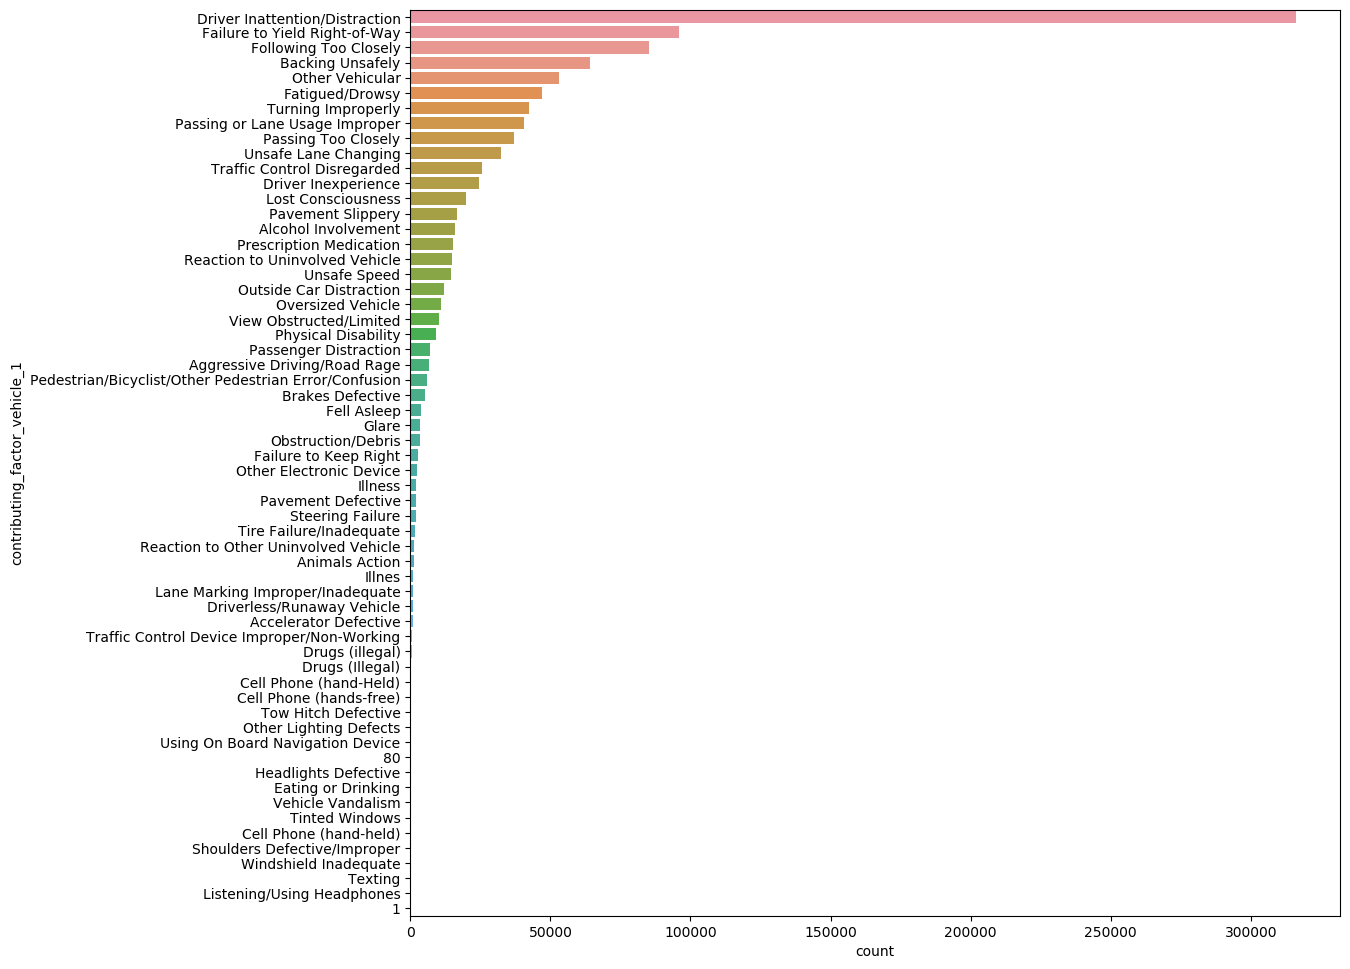

In [55]:
sns.countplot(y = 'contributing_factor_vehicle_1',
              data = data,
              order = data['contributing_factor_vehicle_1'].value_counts().index)